# Progetto 1: ordinamento di stringhe

### Librerie Utilizzate

In [ ]:
import timeit
import re
import matplotlib.pyplot as plt

### Definizione BubbleSort

In [3]:
def bubbleSort(array):
    swapped = False
    for i in range(len(array)-1,0,-1):
        for j in range(i):
            if array[j]>array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
                swapped= True
        if swapped:
            swapped=False
        else:
            break
    return array

### Definizione HeapSort

In [4]:
def heapify(array, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    
    if l < n and array[i] < array[l]:
        largest = l
    if r < n and array[largest] < array[r]:

        largest = r
    
    if largest != i:
        array[i], array[largest] = array[largest], array[i]
        heapify(array, n, largest)

def heapSort(array):
    n = len(array)
    for i in range(n//2, -1, -1):
        heapify(array, n, i)
    for i in range(n-1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, i, 0)
    return array

### Definizione InsertionSort

In [5]:
def insertionSort(array):
    for i in range(1, len(array)):
        key = array[i]
        j = i-1
        while array[j] > key and j >= 0:
            array[j+1] = array[j]
            j -= 1
        array[j+1] = key
    return array

### Definizione QuickSort

In [6]:
def quickSort(array):
    if len(array)> 1:
        pivot=array.pop()
        grtr_lst, equal_lst, smlr_lst = [], [pivot], []
        for item in array:
            if item == pivot:
                equal_lst.append(item)
            elif item > pivot:
                grtr_lst.append(item)
            else:
                smlr_lst.append(item)
        return (quickSort(smlr_lst) + equal_lst + quickSort(grtr_lst))
    else:
        return array

### Funzione per pulire i file

In [7]:
#definiamo una funzione che prende in input un file
def replace(file):
    #apre il file file in modalità lettura
    f=open(file,"r")
    #legge il file e lo assegna ad una variabile
    arr = f.read()
    #inizializziamo una lista vuota
    lista = []
    #Inseriamo nella lista appena creata il contenuto del file senza la punteggiatura
    lista += re.findall(r"\w+", arr)
    #Filtriamo le parole scartando i caratteri numerici
    arr_filtered = filter(str.isalpha, lista)
    #inseriamo in una variabile la stringa contenente i valori filtrati separati da uno spazio
    arr_filtered = " ".join(arr_filtered)
    #Trasformiamo la stringa di caratteri in un array di stringhe separandole con gli spazi 
    arr_filtered = arr_filtered.split(" ")
    #Ritorna l'array pulito
    return arr_filtered

### Analisi Sceneggiature Star Wars

Abbiamo applicato gli algoritmi definiti precedentemente sul file txt contenente le sceneggiature della trilogia originale di Star Wars  

10 Elements Sorted by HeapSort in  8.290000005217735e-05
20 Elements Sorted by HeapSort in  0.0001545999984955415
30 Elements Sorted by HeapSort in  0.0001551000004837988
50 Elements Sorted by HeapSort in  0.0005428000004030764
100 Elements Sorted by HeapSort in  0.0012557000009110197
200 Elements Sorted by HeapSort in  0.002822699998432654
300 Elements Sorted by HeapSort in  0.004598900000928552
500 Elements Sorted by HeapSort in  0.004287199999453151
1000 Elements Sorted by HeapSort in  0.01158699999905366
2000 Elements Sorted by HeapSort in  0.027607100000750506
3000 Elements Sorted by HeapSort in  0.04671009999947273
5000 Elements Sorted by HeapSort in  0.08295760000146402
10000 Elements Sorted by HeapSort in  0.17585329999928945
20000 Elements Sorted by HeapSort in  0.3929776999993919
30000 Elements Sorted by HeapSort in  0.8058805000000575
50000 Elements Sorted by HeapSort in  1.1731171999999788
75000 Elements Sorted by HeapSort in  2.0650824000003922


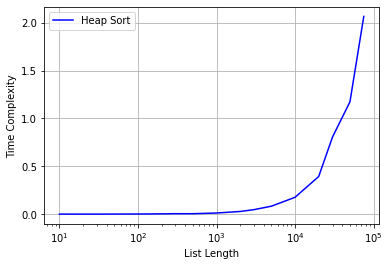

In [40]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_star_heap = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo HeapSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("StarWars.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo HeapSort tramite funzione prima definita...
    heapSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()

    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo 
    print(len(arr), "Elements Sorted by HeapSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo 
    parole.append(len(arr))
    #inserimao nella lista tempi_star_heap il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_star_heap.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_star_heap, label ='Heap Sort', color = "b")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("star_heap.png")
plt.show()

10 Elements Sorted by InsertionSort in  3.520000245771371e-05
20 Elements Sorted by InsertionSort in  5.709999823011458e-05
30 Elements Sorted by InsertionSort in  8.270000034826808e-05
50 Elements Sorted by InsertionSort in  0.0001818999990064185
100 Elements Sorted by InsertionSort in  0.0007406999975501094
200 Elements Sorted by InsertionSort in  0.0036815999992541037
300 Elements Sorted by InsertionSort in  0.008036400002310984
500 Elements Sorted by InsertionSort in  0.025470500000665197
1000 Elements Sorted by InsertionSort in  0.1039225999993505
2000 Elements Sorted by InsertionSort in  0.4573597999988124
3000 Elements Sorted by InsertionSort in  1.1190631999998004
5000 Elements Sorted by InsertionSort in  2.8767079999997804
10000 Elements Sorted by InsertionSort in  12.536083900002268
20000 Elements Sorted by InsertionSort in  63.231374400002096
30000 Elements Sorted by InsertionSort in  144.89759670000058
50000 Elements Sorted by InsertionSort in  411.2155047000015
75000 Eleme

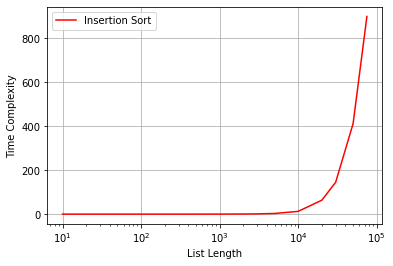

In [46]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_star_insertion = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo InsertionSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("StarWars.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo InsertionSort tramite funzione prima definita...
    insertionSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by InsertionSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_star_insertion il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_star_insertion.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_star_insertion, label ='Insertion Sort', color = "r")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("star_insertion.png")
plt.show()

9 Elements Sorted by QuickSort in  2.8399999791872688e-05
19 Elements Sorted by QuickSort in  7.919999916339293e-05
29 Elements Sorted by QuickSort in  0.00021550000019487925
49 Elements Sorted by QuickSort in  0.00022399999943445437
99 Elements Sorted by QuickSort in  0.0002609000002848916
199 Elements Sorted by QuickSort in  0.00041619999865361024
299 Elements Sorted by QuickSort in  0.0008404000000155065
499 Elements Sorted by QuickSort in  0.0029402999989542877
999 Elements Sorted by QuickSort in  0.0023956000004545785
1999 Elements Sorted by QuickSort in  0.012413399999786634
2999 Elements Sorted by QuickSort in  0.0113932999993267
4999 Elements Sorted by QuickSort in  0.02540009999938775
9999 Elements Sorted by QuickSort in  0.027987499999653664
19999 Elements Sorted by QuickSort in  0.06001809999906982
29999 Elements Sorted by QuickSort in  0.11175059999914083
49999 Elements Sorted by QuickSort in  0.19024410000019998
74999 Elements Sorted by QuickSort in  0.33548870000049646


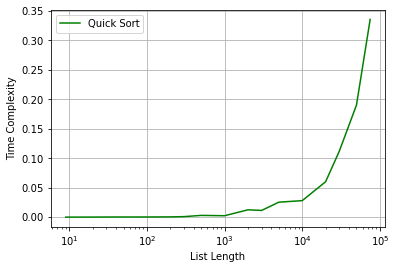

In [44]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_star_quick = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo QuickSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("StarWars.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo QuickSort tramite funzione prima definita...
    quickSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by QuickSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_star_quick il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_star_quick.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_star_quick, label ='Quick Sort', color = "g")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("star_quick.png")
plt.show() 

10 Elements Sorted by BubbleSort in  2.8300000849412754e-05
20 Elements Sorted by BubbleSort in  8.120000347844325e-05
30 Elements Sorted by BubbleSort in  0.00013799999942420982
50 Elements Sorted by BubbleSort in  0.0003049000006285496
100 Elements Sorted by BubbleSort in  0.0028681000003416557
200 Elements Sorted by BubbleSort in  0.006083299998863367
300 Elements Sorted by BubbleSort in  0.01365549999900395
500 Elements Sorted by BubbleSort in  0.04458610000074259
1000 Elements Sorted by BubbleSort in  0.20316249999814318
2000 Elements Sorted by BubbleSort in  0.7879613999975845
3000 Elements Sorted by BubbleSort in  1.6652051999990363
5000 Elements Sorted by BubbleSort in  4.770651700000599
10000 Elements Sorted by BubbleSort in  19.800490499997977
20000 Elements Sorted by BubbleSort in  85.62726110000222
30000 Elements Sorted by BubbleSort in  228.568082400001
50000 Elements Sorted by BubbleSort in  740.706784799997
75000 Elements Sorted by BubbleSort in  1731.7857489000016


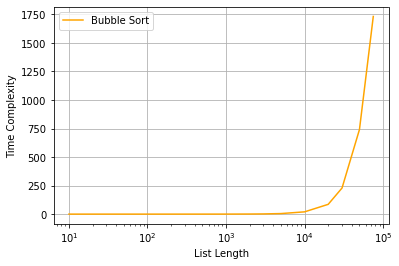

In [48]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_star_bubble = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo BubbleSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("StarWars.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo BubbleSort tramite funzione prima definita...
    bubbleSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by BubbleSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_star_bubble il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_star_bubble.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_star_bubble, label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("star_bubble.png")
plt.show()

**Grafici di Confronto tra algoritmi**

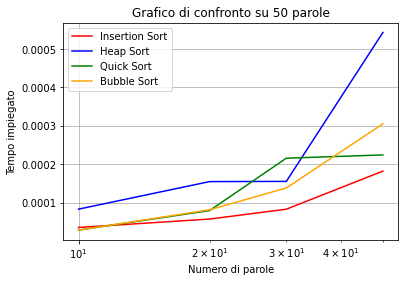

In [103]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 50 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 50 parole
plt.plot(parole[:4], tempi_star_insertion[:4], label ='Insertion Sort', color = "r")
plt.plot(parole[:4], tempi_star_heap[:4], label ='Heap Sort', color = "b")
plt.plot(parole[:4], tempi_star_quick[:4], label ='Quick Sort', color = "g")
plt.plot(parole[:4], tempi_star_bubble[:4], label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("star_algo1.png")
plt.show()

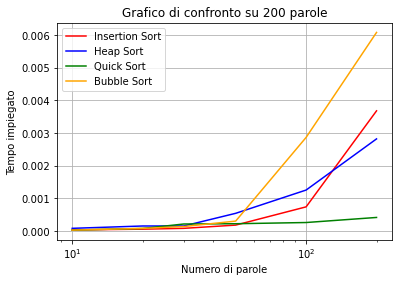

In [101]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 200 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 200 parole
plt.plot(parole[:6], tempi_star_insertion[:6], label ='Insertion Sort', color = "r")
plt.plot(parole[:6], tempi_star_heap[:6], label ='Heap Sort', color = "b")
plt.plot(parole[:6], tempi_star_quick[:6], label ='Quick Sort', color = "g")
plt.plot(parole[:6], tempi_star_bubble[:6], label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("star_algo2.png")
plt.show()

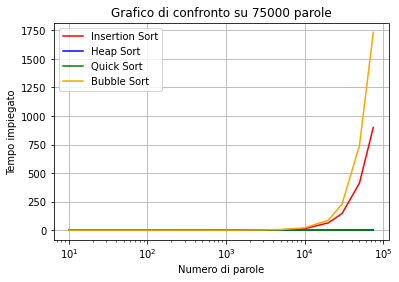

In [102]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 75000 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 75000 parole
plt.plot(parole, tempi_star_insertion, label ='Insertion Sort', color = "r")
plt.plot(parole, tempi_star_heap, label ='Heap Sort', color = "b")
plt.plot(parole, tempi_star_quick, label ='Quick Sort', color = "g")
plt.plot(parole, tempi_star_bubble, label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("star_algo3.png")
plt.show()

### Analisi Sceneggiature Jurassic Park

Abbiamo applicato gli algoritmi definiti precedentemente sul file txt contenente le sceneggiature della trilogia di Jurassic Park  

10 Elements Sorted by HeapSort in  7.639999967068434e-05
20 Elements Sorted by HeapSort in  0.00016340000001946464
30 Elements Sorted by HeapSort in  0.00027579999914451037
50 Elements Sorted by HeapSort in  0.0002752999989752425
100 Elements Sorted by HeapSort in  0.000636099999610451
200 Elements Sorted by HeapSort in  0.0017765000011422671
300 Elements Sorted by HeapSort in  0.0023433000005752547
500 Elements Sorted by HeapSort in  0.005113799999890034
1000 Elements Sorted by HeapSort in  0.010440799998832517
2000 Elements Sorted by HeapSort in  0.022326499998598592
3000 Elements Sorted by HeapSort in  0.036395199998878525
5000 Elements Sorted by HeapSort in  0.07997280000017781
10000 Elements Sorted by HeapSort in  0.1876083999995899
20000 Elements Sorted by HeapSort in  0.5089635999993334
30000 Elements Sorted by HeapSort in  0.6404827000005753
50000 Elements Sorted by HeapSort in  1.0834703000000445
75000 Elements Sorted by HeapSort in  1.6780656999999337


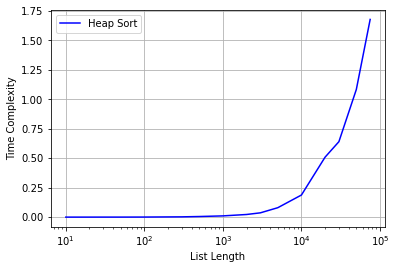

In [41]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_jurassic_heap = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo HeapSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("JurassicPark.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo HeapSort tramite funzione prima definita...
    heapSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by HeapSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_jurassic_heap il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_jurassic_heap.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_jurassic_heap, label ='Heap Sort', color = "b")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("jurassic_heap.png")
plt.show()

10 Elements Sorted by InsertionSort in  3.49000001733657e-05
20 Elements Sorted by InsertionSort in  0.00014990000272518955
30 Elements Sorted by InsertionSort in  0.00019080000129179098
50 Elements Sorted by InsertionSort in  0.0002714000002015382
100 Elements Sorted by InsertionSort in  0.0015819000000192318
200 Elements Sorted by InsertionSort in  0.006690299996989779
300 Elements Sorted by InsertionSort in  0.012146400000347057
500 Elements Sorted by InsertionSort in  0.033460000002378365
1000 Elements Sorted by InsertionSort in  0.15927340000052936
2000 Elements Sorted by InsertionSort in  0.4906176000004052
3000 Elements Sorted by InsertionSort in  1.097641800002748
5000 Elements Sorted by InsertionSort in  3.2419078999992053
10000 Elements Sorted by InsertionSort in  12.470264499999757
20000 Elements Sorted by InsertionSort in  56.418137300002854
30000 Elements Sorted by InsertionSort in  146.43385059999855
50000 Elements Sorted by InsertionSort in  418.57791989999896
75000 Elem

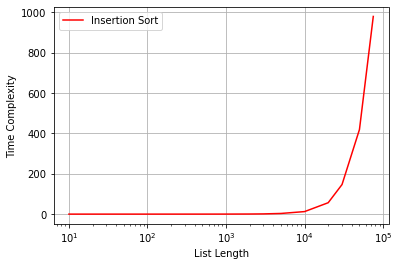

In [49]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_jurassic_insertion = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo InsertionSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("JurassicPark.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo InsertionSort tramite funzione prima definita...
    insertionSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by InsertionSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_jurassic_insertion il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_jurassic_insertion.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_jurassic_insertion, label ='Insertion Sort', color = "r")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("jurassic_insertion.png")
plt.show()

9 Elements Sorted by QuickSort in  2.5299999833805487e-05
19 Elements Sorted by QuickSort in  4.2100000428035855e-05
29 Elements Sorted by QuickSort in  6.919999941601418e-05
49 Elements Sorted by QuickSort in  0.00011939999967580661
99 Elements Sorted by QuickSort in  0.0002235000010841759
199 Elements Sorted by QuickSort in  0.000575399999434012
299 Elements Sorted by QuickSort in  0.0008546999997633975
499 Elements Sorted by QuickSort in  0.001112799998736591
999 Elements Sorted by QuickSort in  0.0038703000009263633
1999 Elements Sorted by QuickSort in  0.004785999999512569
2999 Elements Sorted by QuickSort in  0.007202000000688713
4999 Elements Sorted by QuickSort in  0.012873399999079993
9999 Elements Sorted by QuickSort in  0.026319799999328097
19999 Elements Sorted by QuickSort in  0.06962019999991753
29999 Elements Sorted by QuickSort in  0.09789089999867429
49999 Elements Sorted by QuickSort in  0.16306509999958507
74999 Elements Sorted by QuickSort in  0.24480160000166507


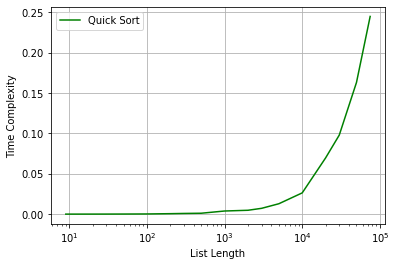

In [43]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_jurassic_quick = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo QuickSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("JurassicPark.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo QuickSort tramite funzione prima definita...
    quickSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by QuickSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_jurassic_quick il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_jurassic_quick.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_jurassic_quick, label ='Quick Sort', color = "g")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("jurassic_quick.png")
plt.show() 

10 Elements Sorted by BubbleSort in  5.070000042906031e-05
20 Elements Sorted by BubbleSort in  0.0002333999982511159
30 Elements Sorted by BubbleSort in  0.0002640999991854187
50 Elements Sorted by BubbleSort in  0.001784099997166777
100 Elements Sorted by BubbleSort in  0.002081899998302106
200 Elements Sorted by BubbleSort in  0.011502599998493679
300 Elements Sorted by BubbleSort in  0.022071999999752734
500 Elements Sorted by BubbleSort in  0.06740020000142977
1000 Elements Sorted by BubbleSort in  0.2910636999986309
2000 Elements Sorted by BubbleSort in  1.436611900000571
3000 Elements Sorted by BubbleSort in  3.081794199999422
5000 Elements Sorted by BubbleSort in  10.596249700000044
10000 Elements Sorted by BubbleSort in  35.74403080000047
20000 Elements Sorted by BubbleSort in  116.07988050000131
30000 Elements Sorted by BubbleSort in  262.4008157999997
50000 Elements Sorted by BubbleSort in  798.2975729999998
75000 Elements Sorted by BubbleSort in  1746.5085011999981


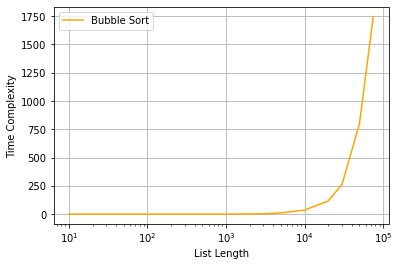

In [50]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_jurassic_bubble = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo BubbleSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("JurassicPark.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo BubbleSort tramite funzione prima definita...
    bubbleSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by BubbleSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_jurassic_bubble il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_jurassic_bubble.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_jurassic_bubble, label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("jurassic_bubble.png")
plt.show()

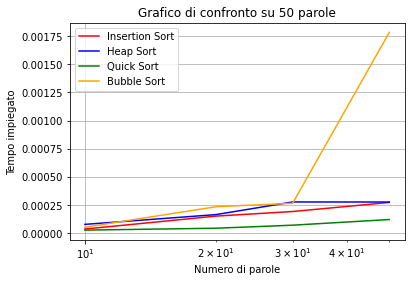

In [105]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 50 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 50 parole
plt.plot(parole[:4], tempi_jurassic_insertion[:4], label ='Insertion Sort', color = "r")
plt.plot(parole[:4], tempi_jurassic_heap[:4], label ='Heap Sort', color = "b")
plt.plot(parole[:4], tempi_jurassic_quick[:4], label ='Quick Sort', color = "g")
plt.plot(parole[:4], tempi_jurassic_bubble[:4], label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("jurassic_algo1.png")
plt.show()

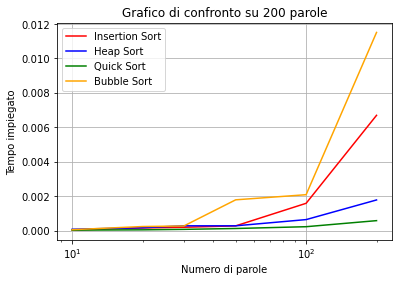

In [106]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 200 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 200 parole
plt.plot(parole[:6], tempi_jurassic_insertion[:6], label ='Insertion Sort', color = "r")
plt.plot(parole[:6], tempi_jurassic_heap[:6], label ='Heap Sort', color = "b")
plt.plot(parole[:6], tempi_jurassic_quick[:6], label ='Quick Sort', color = "g")
plt.plot(parole[:6], tempi_jurassic_bubble[:6], label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("jurassic_algo2.png")
plt.show()

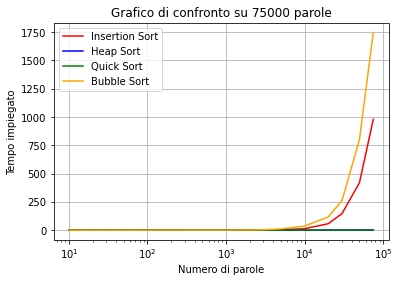

In [107]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 75000 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 75000 parole
plt.plot(parole, tempi_jurassic_insertion, label ='Insertion Sort', color = "r")
plt.plot(parole, tempi_jurassic_heap, label ='Heap Sort', color = "b")
plt.plot(parole, tempi_jurassic_quick, label ='Quick Sort', color = "g")
plt.plot(parole, tempi_jurassic_bubble, label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("jurassic_algo3.png")
plt.show()

### Analisi Sceneggiature Indiana Jones

Abbiamo applicato gli algoritmi definiti precedentemente sul file txt contenente le sceneggiature di tre film della saga di Indiana Jones  

10 Elements Sorted by HeapSort in  7.700000060140155e-05
20 Elements Sorted by HeapSort in  0.00011009999980160501
30 Elements Sorted by HeapSort in  0.0001869000006990973
50 Elements Sorted by HeapSort in  0.0002840000015567057
100 Elements Sorted by HeapSort in  0.0006419000001187669
200 Elements Sorted by HeapSort in  0.00141299999995681
300 Elements Sorted by HeapSort in  0.0022262000002228888
500 Elements Sorted by HeapSort in  0.005294500000672997
1000 Elements Sorted by HeapSort in  0.00959329999932379
2000 Elements Sorted by HeapSort in  0.02145310000014433
3000 Elements Sorted by HeapSort in  0.036973000000216416
5000 Elements Sorted by HeapSort in  0.06951019999905839
10000 Elements Sorted by HeapSort in  0.14026120000016817
20000 Elements Sorted by HeapSort in  0.33046790000116744
30000 Elements Sorted by HeapSort in  0.5849806000005628
50000 Elements Sorted by HeapSort in  1.069029899999805
75000 Elements Sorted by HeapSort in  1.7284338999998


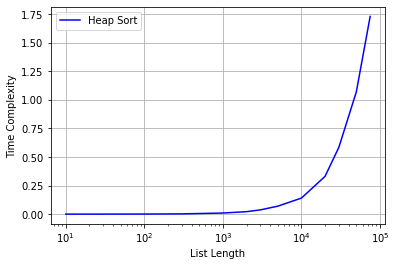

In [42]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_indiana_heap = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo HeapSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("IndianaJones.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo HeapSort tramite funzione prima definita...
    heapSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by HeapSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_indiana_heap il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_indiana_heap.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_indiana_heap, label ='Heap Sort', color = "b")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("indiana_heap.png")
plt.show()

10 Elements Sorted by InsertionSort in  3.099999958067201e-05
20 Elements Sorted by InsertionSort in  7.60000002628658e-05
30 Elements Sorted by InsertionSort in  0.00013689999832422473
50 Elements Sorted by InsertionSort in  0.0003251999987696763
100 Elements Sorted by InsertionSort in  0.0013156999993952923
200 Elements Sorted by InsertionSort in  0.0037622999989253003
300 Elements Sorted by InsertionSort in  0.016547600000194507
500 Elements Sorted by InsertionSort in  0.039864999998826534
1000 Elements Sorted by InsertionSort in  0.13095439999960945
2000 Elements Sorted by InsertionSort in  0.6575271000001521
3000 Elements Sorted by InsertionSort in  1.5605109999996785
5000 Elements Sorted by InsertionSort in  4.576646500001516
10000 Elements Sorted by InsertionSort in  17.80489099999977
20000 Elements Sorted by InsertionSort in  68.25298079999993
30000 Elements Sorted by InsertionSort in  142.8743052000027
50000 Elements Sorted by InsertionSort in  433.0334781999991
75000 Elements

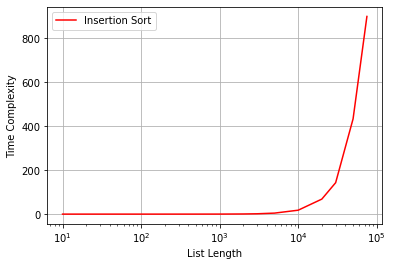

In [51]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_indiana_insertion = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo InsertionSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("IndianaJones.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo InsertionSort tramite funzione prima definita...
    insertionSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by InsertionSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_indiana_insertion il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_indiana_insertion.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_indiana_insertion, label ='Insertion Sort', color = "r")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("indiana_insertion.png")
plt.show()

9 Elements Sorted by QuickSort in  4.3000000005122274e-05
19 Elements Sorted by QuickSort in  5.090000013296958e-05
29 Elements Sorted by QuickSort in  7.60000002628658e-05
49 Elements Sorted by QuickSort in  0.00011350000022503082
99 Elements Sorted by QuickSort in  0.00022679999892716296
199 Elements Sorted by QuickSort in  0.0004862000005232403
299 Elements Sorted by QuickSort in  0.0007208999995782506
499 Elements Sorted by QuickSort in  0.0011544999997568084
999 Elements Sorted by QuickSort in  0.0021517999994102865
1999 Elements Sorted by QuickSort in  0.005370499999116873
2999 Elements Sorted by QuickSort in  0.0069004999986646
4999 Elements Sorted by QuickSort in  0.01361940000060713
9999 Elements Sorted by QuickSort in  0.030878700001267134
19999 Elements Sorted by QuickSort in  0.05396210000071733
29999 Elements Sorted by QuickSort in  0.08369200000015553
49999 Elements Sorted by QuickSort in  0.16781530000116618
74999 Elements Sorted by QuickSort in  0.31486859999859007


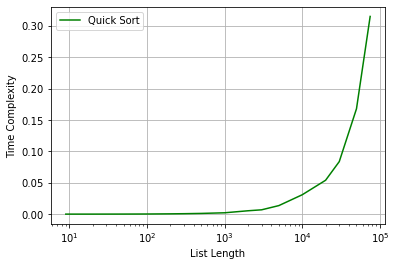

In [45]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_indiana_quick = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo QuickSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("IndianaJones.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo QuickSort tramite funzione prima definita...
    quickSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by QuickSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_indiana_quick il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_indiana_quick.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_indiana_quick, label ='Quick Sort', color = "g")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("indiana_quick.png")
plt.show() 

10 Elements Sorted by BubbleSort in  8.009999874047935e-05
20 Elements Sorted by BubbleSort in  0.00013250000120024197
30 Elements Sorted by BubbleSort in  0.00021740000011050142
50 Elements Sorted by BubbleSort in  0.0014847999991616234
100 Elements Sorted by BubbleSort in  0.0050379999993310776
200 Elements Sorted by BubbleSort in  0.01458719999936875
300 Elements Sorted by BubbleSort in  0.023816199998691445
500 Elements Sorted by BubbleSort in  0.07387600000220118
1000 Elements Sorted by BubbleSort in  0.3460842999993474
2000 Elements Sorted by BubbleSort in  1.373190300000715
3000 Elements Sorted by BubbleSort in  3.014230199998565
5000 Elements Sorted by BubbleSort in  8.392975300001126
10000 Elements Sorted by BubbleSort in  33.87658620000002
20000 Elements Sorted by BubbleSort in  124.80477830000018
30000 Elements Sorted by BubbleSort in  265.58051049999995
50000 Elements Sorted by BubbleSort in  748.5894896999998
75000 Elements Sorted by BubbleSort in  1717.2567264999998


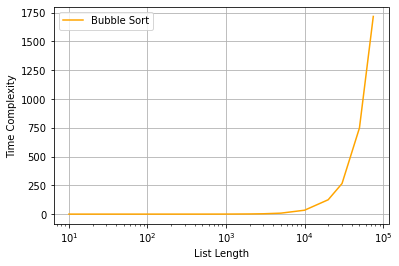

In [52]:
#inizializziamo due liste vuote una per i tempi e una per le parole
parole = list()
tempi_indiana_bubble = list()

#definiamo una lista contenente la quantità di parole da voler ordinare
rang = [10,20,30,50,100,200,300,500,1000,2000,3000,5000,10000,20000,30000, 50000, 75000]
#definiamo un ciclo for per calcolare i tempi di esecuzione dell'algoritmo BubbleSort 
#al variare della dimensione dell'input
for i in rang:
    #attribuiamo alla variabile il contenuto del file pulito attraverso la funzione replace prima definita
    arr = replace("IndianaJones.txt")
    #variamo la grandezza della lista ad ogni ciclo in base al range definito con la lista rang
    arr = arr[:i]
    #Grazie alla libreria timeit associamo alla variabile start il tempo iniziale...
    start = timeit.default_timer()
    #...poi applichiamo l'algoritmo BubbleSort tramite funzione prima definita...
    bubbleSort(arr)
    #...infine tramite libreria timeit associamo alla variabile end il tempo al termine dell'esecuzione
    end = timeit.default_timer()
    
    #Stampiamo a schermo una verifica del corretto funzionamento e i tempi di esecuzione ad ogni ciclo
    print(len(arr), "Elements Sorted by BubbleSort in ", end-start)
    #inseriamo nella lista parole la quantità di parole ordinate ad ogni ciclo
    parole.append(len(arr))
    #inserimao nella lista tempi_indiana_bubble il tempo di esecuzione dell'algoritmo ad ogni ciclo 
    tempi_indiana_bubble.append(end-start)

#definiamo i parametri per la creazione del grafico
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(parole, tempi_indiana_bubble, label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("indiana_bubble.png")
plt.show()

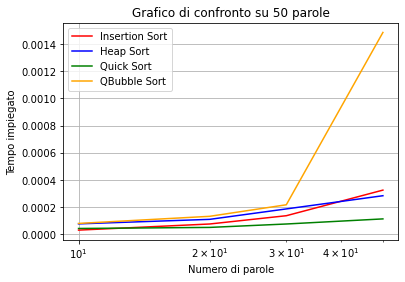

In [111]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 50 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 50 parole
plt.plot(parole[:4], tempi_indiana_insertion[:4], label ='Insertion Sort', color = "r")
plt.plot(parole[:4], tempi_indiana_heap[:4], label ='Heap Sort', color = "b")
plt.plot(parole[:4], tempi_indiana_quick[:4], label ='Quick Sort', color = "g")
plt.plot(parole[:4], tempi_indiana_bubble[:4], label ='QBubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("indiana_algo1.png")
plt.show()

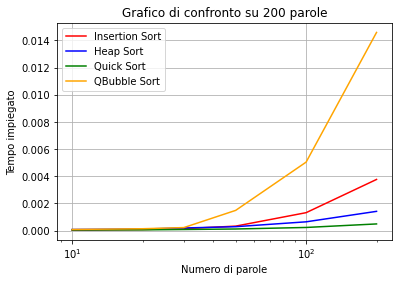

In [112]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 200 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 200 parole
plt.plot(parole[:6], tempi_indiana_insertion[:6], label ='Insertion Sort', color = "r")
plt.plot(parole[:6], tempi_indiana_heap[:6], label ='Heap Sort', color = "b")
plt.plot(parole[:6], tempi_indiana_quick[:6], label ='Quick Sort', color = "g")
plt.plot(parole[:6], tempi_indiana_bubble[:6], label ='QBubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("indiana_algo2.png")
plt.show()

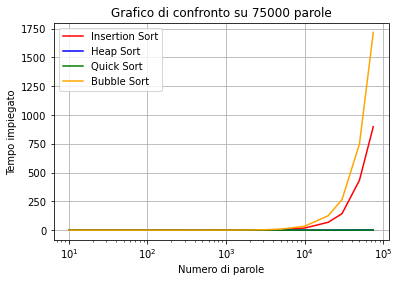

In [108]:
#definizione i parametri per la creazione del grafico
plt.xlabel('Numero di parole')
plt.ylabel('Tempo impiegato')
plt.title('Grafico di confronto su 75000 parole')
#Grafichiamo gli andamenti degli algoritmi per ordinare fino a 75000 parole
plt.plot(parole, tempi_indiana_insertion, label ='Insertion Sort', color = "r")
plt.plot(parole, tempi_indiana_heap, label ='Heap Sort', color = "b")
plt.plot(parole, tempi_indiana_quick, label ='Quick Sort', color = "g")
plt.plot(parole, tempi_indiana_bubble, label ='Bubble Sort', color = "orange")
#impostiamo la scala logaritmica per l'asse x
plt.semilogx()
plt.grid()
plt.legend()
#salviamo il grafico ottenuto
plt.savefig("indiana_algo3.png")
plt.show()